<a href="https://colab.research.google.com/github/malooty/malooty/blob/main/astro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 2.1 MB/s 


In [3]:
from astropy.visualization import hist
from astroML.datasets import fetch_sdss_specgals
from astropy.visualization import hist
data = fetch_sdss_specgals()
data

array([(146.71419105, -1.04127639, 51630, 266,   1, 0.02122228, 9.46538148e-06, 1.5006211, 131.86357,  4.1935244, 0.15192488, 14.841243, 16.591177, 0.01465266, 17.150417, 0.01122162, 15.497092, 0.00265413, 14.674012, 0.00226598, 14.234288, 0.00226491, 13.907544, 0.00359701, 3.2909405,  9.531493 , 224.11356  , 8.453454 , 472.5904   , 10.049169 , 68.39606  , 6.6106386, 119.49564  , 6.6502748, 23.382048  , 6.4335184, 1.8645095, 0.01444629,  3, 10.294713, -0.5273424 , 1237648720142401611, 299489677444933632),
       (146.74414186, -0.6522198 , 51630, 266,   2, 0.20378332, 3.89048037e-05, 1.3029457, 174.16476, 13.752029 , 0.23067077, 17.788576, 18.9321  , 0.01302888, 21.334766, 0.23458508, 19.1311  , 0.01685353, 17.710718, 0.00815914, 17.149128, 0.0069665 , 16.756086, 0.01552183, 1.9756857,  6.0218143,  -2.4305305, 1.858887 ,   3.4172215,  1.6959478,  5.1728916, 1.9730024,   6.602319 , 2.697799 ,  1.2212139 , 2.1021197, 2.1578927, 0.0547132 , -1, 11.365371, -0.77233875, 1237650795146510627,

In [4]:
import pandas as pd
data1 = pd.DataFrame(data)

In [5]:
data1.head()

,ra,dec,mjd,plate,fiberID,z,zErr,rChi2,velDisp,velDispErr,...,h_beta_flux_err,h_delta_flux,h_delta_flux_err,d4000,d4000_err,bptclass,lgm_tot_p50,sfr_tot_p50,objID,specObjID
0,146.714191,-1.041276,51630,266,1,0.021222,0.000009,1.500621,131.863571,4.193524,...,6.650275,23.382048,6.433518,1.864509,0.014446,3,10.294713,-0.527342,1237648720142401611,299489677444933632
1,146.744142,-0.652220,51630,266,2,0.203783,0.000039,1.302946,174.164764,13.752029,...,2.697799,1.221214,2.102120,2.157893,0.054713,-1,11.365371,-0.772339,1237650795146510627,299489952322840576
2,146.628573,-0.765147,51630,266,4,0.064656,0.000021,1.227630,123.036331,9.821034,...,2.906838,6.669699,3.581208,1.798716,0.030005,3,10.565862,-1.155230,1237650795146445031,299490502078654464
3,146.631673,-0.988261,51630,266,6,0.052654,0.000009,1.404003,41.803913,24.241034,...,2.279489,11.307991,3.058364,1.388878,0.033203,1,9.363875,-0.411009,1237648720142401670,299491051834468352
4,146.919416,-0.990517,51630,266,7,0.213861,0.000040,1.332148,143.521133,14.563519,...,2.622802,0.239994,2.116302,1.923569,0.047452,-1,11.161670,-0.350026,1237648720142532891,299491326712375296


In [6]:
data1.columns

Index(['ra', 'dec', 'mjd', 'plate', 'fiberID', 'z', 'zErr', 'rChi2', 'velDisp',
       'velDispErr', 'extinction_r', 'petroMag_r', 'psfMag_r', 'psfMagErr_r',
       'modelMag_u', 'modelMagErr_u', 'modelMag_g', 'modelMagErr_g',
       'modelMag_r', 'modelMagErr_r', 'modelMag_i', 'modelMagErr_i',
       'modelMag_z', 'modelMagErr_z', 'petroR50_r', 'petroR90_r',
       'nii_6584_flux', 'nii_6584_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_beta_flux', 'h_beta_flux_err', 'h_delta_flux', 'h_delta_flux_err',
       'd4000', 'd4000_err', 'bptclass', 'lgm_tot_p50', 'sfr_tot_p50', 'objID',
       'specObjID'],
      dtype='object')

(0.0, 0.4)

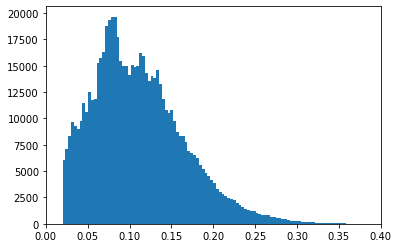

In [8]:
import numpy as np
from matplotlib import pyplot as plt
hist(data1['z'], bins=200)
plt.xlim(0, 0.4)


caching to /root/astroML_data/SDSSspec/1615/spSpec-53166-1615-001.fit


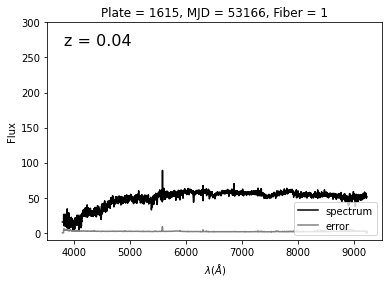

In [11]:
from astroML.datasets import fetch_sdss_spectrum

# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 1

spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300)

plt.show()